# **Análisis de precios de autos usados**

## **Adquisición de datos y entendimiento de la información**
Es el proceso de cargar y leer los datos en Python desde varias fuentes.
En nuestro caso, obtuvimos el dataset desde la web.

[Aquí el link al dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data)

In [2]:
import pandas as pd
import numpy as np
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(dataset_url, header = None)  # Nuestro dataset no contiene encabezado, por ende debemos especificarlo

Hechemos un vistazo a las primeras 5 filas del dataframe

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Ahora miremos las últimas 3 filas del dataframe

In [4]:
df.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


Necesitamos asignar encabezados a las columnas, afortunadamente conocemos exactamente que título corresponde.
Vamos a crear una lista con los encabezados y reemplazar los que se asignaron por defecto.

In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Si quisieramos solamente conocer el nuevo encabezado podemos hacer lo siguiete:

In [6]:
print(df.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


Ahora vamos a guardar nuestro trabajo localmente en nuestra máquina.
Debemos especificar la ruta incluyendo el nombre que deseamos que el documento tenga.

In [7]:
path = r"C:\Users\ulloa\programing\coursera\ibm_data_scientist\automobile.csv"
df.to_csv(path)

### *Primeros análisis sobre el dataset*
Nos permite conocer con que tipo de datos estamos trabajando, como también identificar posibles problemas con la información que deberemos corregir en proximos pasos.

In [8]:
df.dtypes  # nos entrega que tipo de dato contiene cada columna ("object" en pandas --> "str" en python)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Ahora nos gustaría ver un resumen estadístico de cada columna para aprender sobre la distrubución de la información

In [9]:
df.describe()  # por defecto, ignora columnas que no contienen tipos de datos númericos

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Digamos que nos interesaría ver estas estadísticas, pero para una columna en particular.

In [10]:
df[["price"]].describe()

,price
count,205
unique,187
top,?
freq,4


Si quisieramos analizar el dataframe completo incluyendo las columnas que no contienen valores numéricos, debemos explicitarlo.
Veremos algunos datos extras como:
* unique: Número de valores distintos en la columna.
* top: Es el elemento que se repite mayor cantidad de veces.
* freq: Es el número de veces que el elemento "top" aparece en la columna.

In [11]:
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


## **Data Wrangling (data cleaning) - Pre-procesamiento de los datos**

Es el proceso de convertir o mappear datos del su forma "cruda" inicial en otro formato, para preparar la información para análisis posteriores más complejos.
Objetivos de aprendizaje:
* Identificar y manejar datos faltantes.
* Formatear los datos.
* Normalización: Llevaremos los datos a un rango similar para comparaciones más útiles.
* Binning: Crearemos categorias más grandes para un conjunto de valores numéricos.
* Convertiremos valores categóricos en valores numéricos para hacer modelos estadísticos más precisos.

##### Manejar valores faltantes

Los valores faltantes pueden indicarse como: "?" , NaN, 0 o simplemente una celda en blanco.
Existen diversas maneras en las que podemos manejar este tipo de datos. Podriamos por ejemplo eliminar directamente la columna que presenta muchos valores faltantes, o solamente eliminar esa entrada específica sin datos. También podríamos optar por reemplazar estos faltantes mediante diversos métodos, como por ejemplo reemplazarlos por el valor medio, en el caso de datos no numericos, podriamos reemplazar por frecuencia. También podemos optar por dejar los datos simplemente faltantes para análisis.

**Como eliminar NaN en Python:**
* axis = 0 elimina la fila completa
* axis = 1 elimina la columna completa
* inplace = True permite realizar la modificación directamente sobre el data set. Escribe los resultados en el data frame.

In [12]:
df = df.replace("?", np.nan)  # primero reemplazamos en todo el dataframe "?" por NaN
df.dropna(subset=["price"], axis=0, inplace=True)

También podriamos reemplazar NaN con algun otro valor.

In [13]:
# mean = df["normalized-losses"].mean()
# df["normalized-losses"].replace(np.nan, mean)

**Formatear los datos**
Los datos usualmente son extraídos desde diferentes fuentes y almacenados de diversas formas. Es importante mantener estándares y unidades de ingeniería para hacer comparaciones valiosas.

In [14]:
df["city-mpg"] = 235 / df["city-mpg"]  # Realizamos una conversión de unidades.
df.rename(columns={"city-mpg": "city-l/100km"}, inplace=True)  # cambiamos el nombre de columna apropiadamente

In [15]:
df[["price"]].dtypes  # podemos observar que "price" no es del tipo de dato correcto. Debemos cambiarlo.

price    object
dtype: object

In [16]:
df["price"] = df["price"].astype("int")

Verificamos nuevamente el tipo de datos en la columna "price" del dataframe

In [17]:
df[["price"]].dtypes

price    int32
dtype: object

**Normalización**: Haciendo que los rangos sean cosistentes entre variables logramos una comparación más justa entre las características, garantizando de esta manera que tengan el mismo impacto.

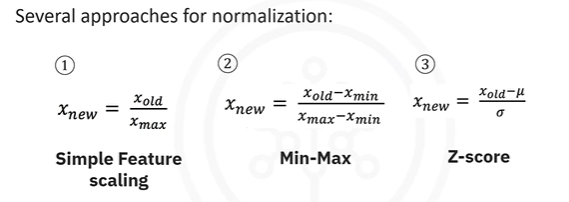

Utilicemos primero el escalado simple de atributos.

In [18]:
df["length"] = df["length"] / df["length"].max()

Ahora utilicemos el método Min-Max

In [19]:
df["width"] = (df["width"] - df["width"].min()) / (df["width"].max() - df["width"].min())

Por último analicemos el método Z-score

In [20]:
df["height"] = (df["height"] - df["height"].mean()) / df["height"].std()

**Agrupamiento** o también conocido como *binning*
Consiste en agrupar los valores. Por ejemplo, crear un rago de precio desde 5.000 a 45.000 y categorizarlos para conventir datos numéricos en datos categóricos, por decir, "bajo" precio de 5-45k, "medio" 45-70k etc.

Veamos esto en Python. Nos gustaría crear 3 grupos espaciados equitativamente, entonces necesitamos como divisor 4. Luego usamos la función "linspace" de Numpy para que retorne un arreglo con los grupos que contienen 4 numeros igualmente espaciados en el intervalo de precio especificado.
Por último usamos la función "cut" de Pandas para segmentar y ordenar los datos en grupos.

In [21]:
bins = np.linspace(min(df["price"]), max(df["price"]), 4)
group_names = ["Low", "Medium", "High"]
df["price-binned"] = pd.cut(df["price"], bins, labels=group_names, include_lowest=True)
df[["price", "price-binned"]].head(10)

,price,price-binned
0,13495,Low
1,16500,Low
2,16500,Low
3,13950,Low
4,17450,Low
5,15250,Low
6,17710,Low
7,18920,Medium
8,23875,Medium
10,16430,Low


**Convertir variables categóricas en variables cuantitativas**
Muchos modelos estadísticos, no pueden tomar tipos de datos tales como Objects/str en sus entradas.
En nuestro data set, el atributo "fuel", es de tipo categórico. Necesitamos convertirlos a un formato numérico.
Ya que "fuel" tiene solamente dos posibilidades "gas" y "diesel" vamos a crear 2 columnas nuevas (features) y asignarle 1 a gas y 0 a diesel.

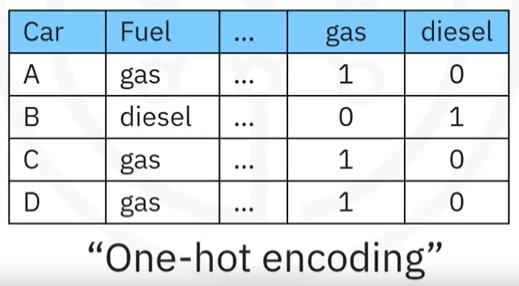

In [22]:
dummy_variable_one = pd.get_dummies(df["fuel-type"])  # El metodo get_dummies crea un nuevo df a partir de una columna o feature
dummy_variable_one.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


Cambiemos los nombres de las columnas para mayor claridad

In [23]:
dummy_variable_one.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_one.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


En nuestro df existe la columna "fuel-type", que tiene los valores "gas" y "diesel". Tenemos que unir el df y dummy_variable_one (que también es un data frame)

In [24]:
df = pd.concat([df, dummy_variable_one], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [25]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-l/100km,highway-mpg,price,price-binned,fuel-type-diesel,fuel-type-gas
0,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000,11.190476,27,13495,Low,False,True
1,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000,11.190476,27,16500,Low,False,True
2,1,NaN,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000,12.368421,26,16500,Low,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500,9.791667,30,13950,Low,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500,13.055556,22,17450,Low,False,True


## **Analicemos ahora en profunidad el data set**
¿En este momento estamos seguros que no tenemos más valores perdidos? ¿En un data set más grande como lo podriamos verificar? ¿celda por celda? ¿o tenemos una forma más rápida de analizarlo?

Veamos esto.

In [26]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")

symboling
False    201
Name: count, dtype: int64

normalized-losses
False    164
True      37
Name: count, dtype: int64

make
False    201
Name: count, dtype: int64

aspiration
False    201
Name: count, dtype: int64

num-of-doors
False    199
True       2
Name: count, dtype: int64

body-style
False    201
Name: count, dtype: int64

drive-wheels
False    201
Name: count, dtype: int64

engine-location
False    201
Name: count, dtype: int64

wheel-base
False    201
Name: count, dtype: int64

length
False    201
Name: count, dtype: int64

width
False    201
Name: count, dtype: int64

height
False    201
Name: count, dtype: int64

curb-weight
False    201
Name: count, dtype: int64

engine-type
False    201
Name: count, dtype: int64

num-of-cylinders
False    201
Name: count, dtype: int64

engine-size
False    201
Name: count, dtype: int64

fuel-system
False    201
Name: count, dtype: int64

bore
False    197
True       4
Name: count, dtype: int64

stroke
False    197
True       4
Name: coun

En base a la salida anterior podemos observar lo siguiente:


normalized-losses
True      37

num-of-doors
True       2

bore
True       4

stroke
True       4

horsepower
True       2

peak-rpm
True       2

Vamos a reemplazar los datos faltantes de "normalized-losses", "bore", "stroke", "horsepower" y "peak-rpm" por su valor medio.

Pero primero vamos a comprobar que debemos realizar cambios en los tipos de datos.

In [27]:
df[["horsepower", "normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"]].dtypes

horsepower           object
normalized-losses    object
bore                 object
stroke               object
horsepower           object
peak-rpm             object
dtype: object

Realizamos entonces esta conversión.

In [28]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses", "peak-rpm", "horsepower"]] = df[["normalized-losses", "peak-rpm", "horsepower"]].astype("float")


Ahora si estamos en condiciones de reemplazar los datos faltantes por su valor medio.

In [29]:
avg_norm_loss = df["normalized-losses"].mean(axis=0)
avg_bore = df["bore"].mean(axis=0)
avg_stroke = df["stroke"].mean(axis=0)
avg_horsepower = df["horsepower"].mean(axis=0)
avg_peakrpm = df['peak-rpm'].mean(axis=0)

df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Nos queda simplemente reemplazar "num-of-doors" por su valor que se repite con mayor frecuencia.
Como podemos observar debajo, nos indica cual es este valor que más se repite.

In [30]:
df["num-of-doors"].value_counts()

num-of-doors
four    113
two      86
Name: count, dtype: int64

o también podemos usar la siguiente expresión, que nos devuelve solamente el valor que más se repite.

In [31]:
df["num-of-doors"].value_counts().idxmax()

'four'

Procedemos con el cambio.

In [32]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

**Binning**

Es el proceso de transformar variables numericas continuas en categorias discretas "bins" o grupos.
En nuestro data set, "horsepower" en una variable entera, con un rango de 48 a 262 y tiene 59 valores unicos.

In [33]:
df["horsepower"].describe()

count    201.000000
mean     103.396985
std       37.365602
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64

Vamos a agruparlos en 3 "bins".
Necesitamos encontrar 3 grupos de igual tamaño.

In [34]:
bins_names = ["low", "medium", "high"]
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Aplicamos la función "cut" para determinar que valor de df['horsepower'] pertenece a que grupo.

48-119 ("Low")
119-190 ("Medium")
190-261 ("High")

In [35]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=bins_names, include_lowest=True)

Podemos ver el número de vehiculos en cada grupo (bins)

In [36]:
df["horsepower-binned"].value_counts()

horsepower-binned
low       153
medium     43
high        5
Name: count, dtype: int64

Mostremos esto en un gráficos de barras

Text(0.5, 1.0, 'horsepower bins')

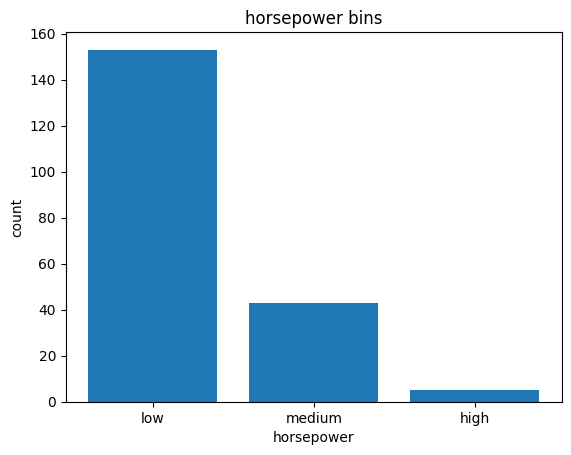

In [37]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(bins_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Ahora mediante un histograma

Text(0.5, 1.0, 'horsepower bins')

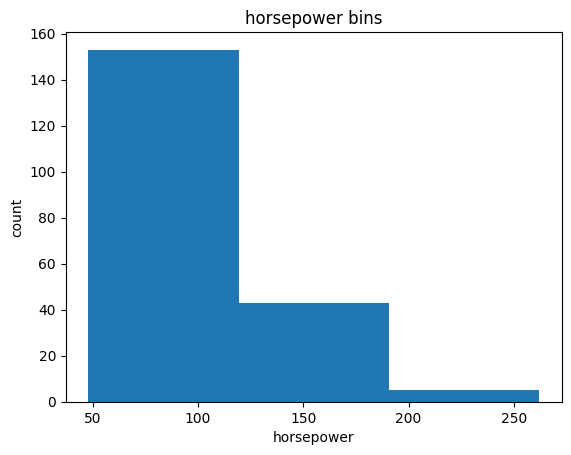

In [38]:
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

**Variable indicador** o dummy variable

Es una variable numerica utilizada para etiquetar categorias. Las utilizamos porque nos permiten utilizar variables categoricas en analisis de regresión.

In [39]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_v2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_v2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_v2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

## **EDA - Exploratory Data Analysis**

Es uno de los pasos preliminares del análisis de datos. Consiste en resumir las principales características de los datos. Busca obtener un mejor entendimiento del data set, descubrir relaciones entre variables.

Buscaremos responder a la pregunta:
¿Cuales son las características que tienen el mayor impacto en el precio de los autos?

Utilizaremos para brindar respuesta:
Estadística descriptiva, la función GroupBy, la metodología ANOVA y correlación.

**Estadística descriptiva**
Necesitamos explorar el data set antes de lanzarnos a construir modelos complejos. Una forma de hacer esto es realizar algunos cálculos estadísticos básicos para nuestra información.

Una forma de hacer esto es como ya hemos visto con el método .describe()

In [40]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-l/100km,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.477697,4.949054e-16,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,9.944145,30.686567,13207.129353
std,1.254802,31.99625,6.066366,0.059213,0.179613,1.000000e+00,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,2.534599,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,0.678039,0.000000,-2.437541e+00,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,0.801538,0.324786,-7.217300e-01,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,0.832292,0.444444,1.361755e-01,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,9.791667,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,0.881788,0.538462,7.081124e-01,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,34.000000,16500.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,2.464776e+00,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,54.000000,45400.000000


Para el caso de variables categóricas (no numéricas) es muy útil el método .value_counts()

In [41]:
df["drive-wheels"].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

Para visualizar e identificar de forma gráfica los valores medios, extremos y valores dispersos podemos usar box plots

<Axes: xlabel='drive-wheels', ylabel='price'>

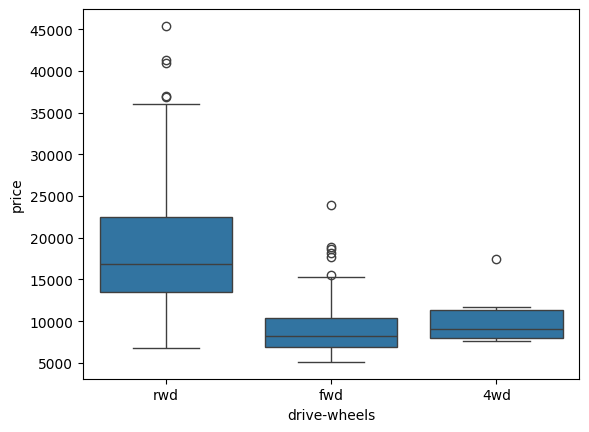

In [42]:
import seaborn as sns
sns.boxplot(x="drive-wheels", y="price", data=df)

Scatter Plots: Representan la relación entre 2 variables.

Predictor/variable independiente: La representamos en el eje "x" y es la variable utilizada para predecir un resultado. ("engine-size")

Target/variable dependiente: La representamos en el eje "y". Es la que intentamos predecir. ("price")


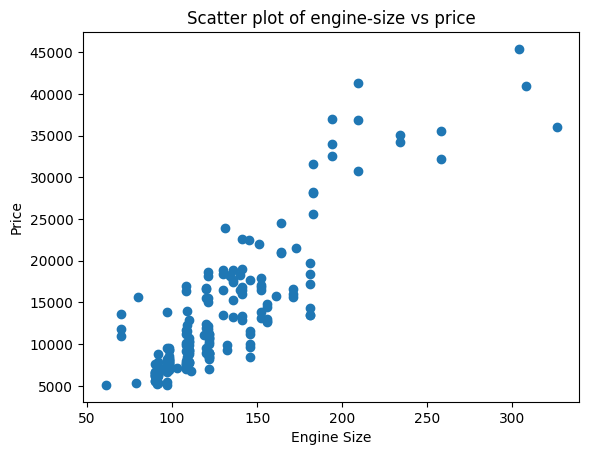

In [43]:
y = df["price"]
x = df["engine-size"]
pyplot.title("Scatter plot of engine-size vs price")
pyplot.xlabel("Engine Size")
pyplot.ylabel("Price")
pyplot.scatter(x,y)

**Grouping**
Con el método groupby --> Utilizado con variables categóricas, crea un subset de las distintas categorías dentro de esa variable.

In [44]:
df_test = df[["drive-wheels", "body-style", "price"]]
df_grp = df_test.groupby(["drive-wheels", "body-style"], as_index=False).mean()  # para este ejemplo estamos interesados en el precio promedio.
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Sin embargo una tabla con este formato no es el más facil de leer ni visualizar. Para eso existe el método pivot de pandas, que nos permite llevarla a un formato más parecido a "Excel".

In [45]:
df_pivot = df_grp.pivot(index="drive-wheels", columns="body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Para visualizarlo lo podemos convertir en un mapa de calor.

C:\Users\ulloa\AppData\Local\Temp\ipykernel_10080\2515569934.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  pyplot.colorbar()


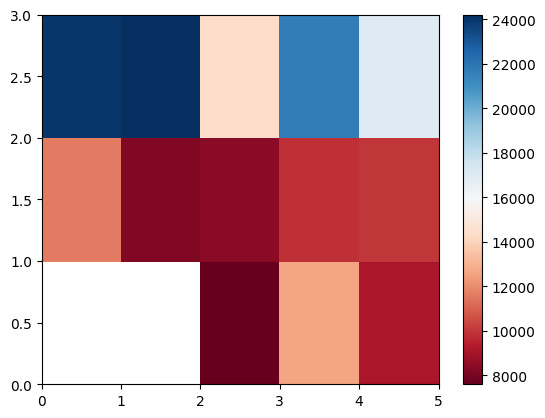

In [46]:
pyplot.pcolor(df_pivot, cmap="RdBu")
pyplot.colorbar()
pyplot.show()

**Correlación**

Mide en que extensión, diferentes variables son interdependientes. Es decir si analizamos dos variables, si una cambia como esta impacta a la otra? Es importante entender que: Que variables estén correlacionadas no implica que este cambio sea producido por una de las variables.

Analicemos un caso de *correlación lineal positiva*: Acá visualizamos los datos en un "scatter plot" y agregamos un linea de regresión. Obsevamos que la pendiente es positiva, lo que nos da una correlación positiva entre el tamaño del motor y el precio.

(0.0, 52892.36537771999)

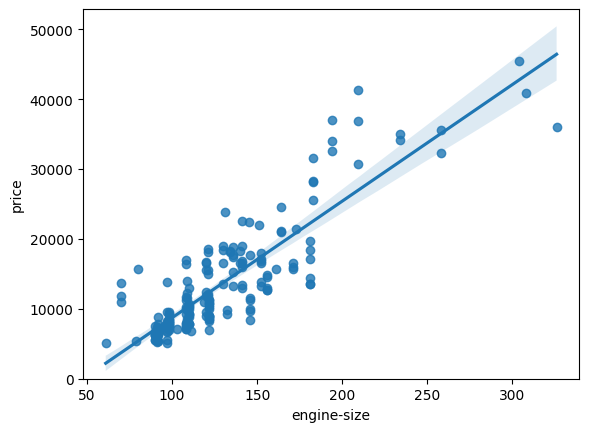

In [47]:
sns.regplot(x="engine-size", y="price", data=df)
pyplot.ylim(0,)

Ahora un caso de *correlación lineal negativa*:

(0.0, 48182.75971793003)

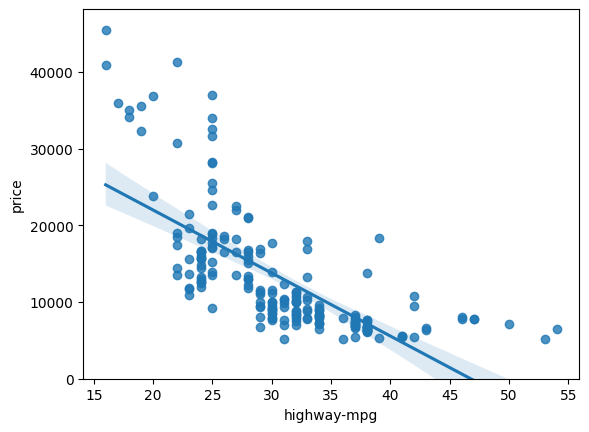

In [48]:
sns.regplot(x="highway-mpg", y="price", data=df)
pyplot.ylim(0,)

Nos queda analizar el caso cuando existe un correlación débil o no correlación en absoluto.

(0.0, 47414.1)

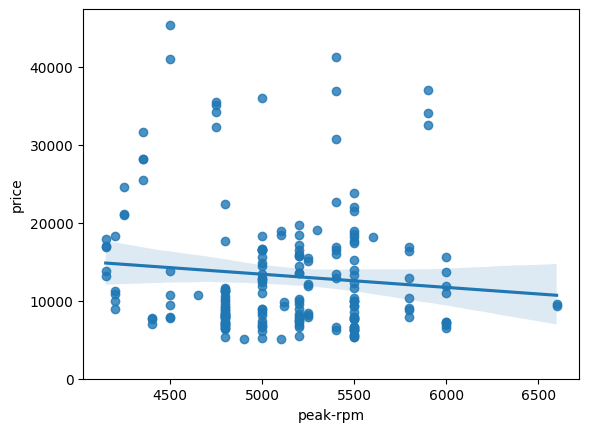

In [49]:
sns.regplot(x="peak-rpm", y="price", data=df)
pyplot.ylim(0,)

**Correlación por el método Pearson** Este método entrega como resultado 2 valores. El coeficiente de correlación y el valor P (P-value)
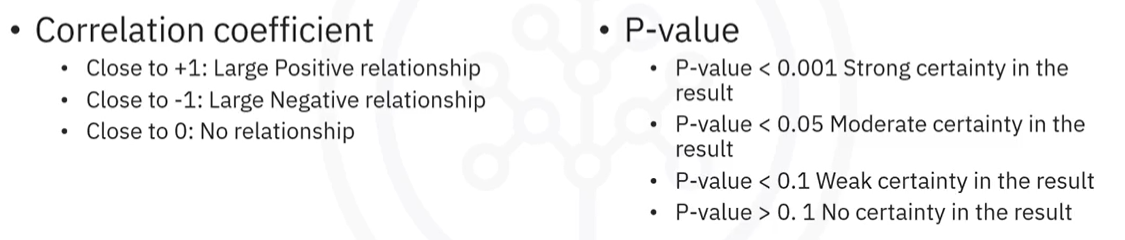

In [53]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
print(pearson_coef)
print(p_value)

0.8096811975632288
6.058444649710116e-48


Otra forma de conocer la correlación.

In [57]:
df[["horsepower", "price"]].corr()  # Observar como nos arroja el coeficiente de pearson.

,horsepower,price
horsepower,1.000000,0.809681
price,0.809681,1.000000


## **Modeling**

* Regresión lineal simple y múltiple
* Evaluación del modelo utilizando visualizaciones.
* Regresión polinomial y pipelines
* R-squared y MSE para evaluación
* Predicción y toma de decisiones.

Un modelo se puede pensar como una ecuación matemática utilizada para predecir un valor a partir de una o más variables, relacionando variables independientes con variables dependientes.

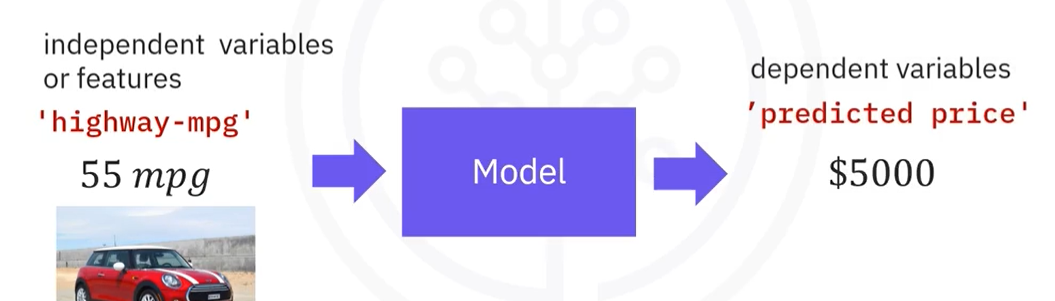

**Regresión Lineal**

Refiere a una variable independiente *(simple linear regression)* o a múltiples variables independientes *(multiple linear regression)* para hacer una predicción.

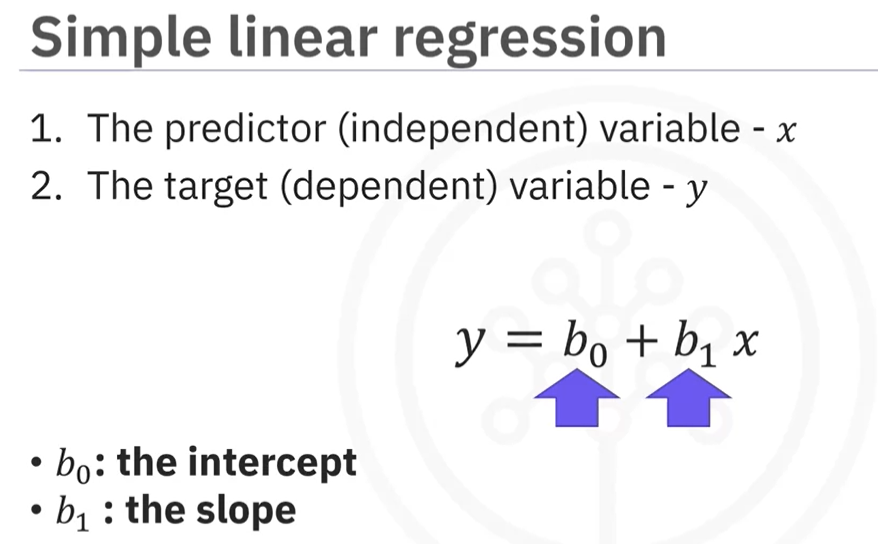